In [1]:
import pandas as pd  # library used for data manipulation and analysis

import numpy as np  # library used for working with arrays

import matplotlib.pyplot as plt  # library for visualization

import seaborn as sns  # library for visualization

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [2]:
url = 'https://raw.githubusercontent.com/gamesconsort/cga-internship-projects/main/probabilistic-sales-forecasting/data/supermarket_sales_data'

df = pd.read_csv(url)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df['Date'].replace('2019', '2022', regex=True, inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2022,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2022,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2022,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2022,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2022,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
#check for any duplicated values since the data is clean  
df.duplicated().sum()

0

# EDA

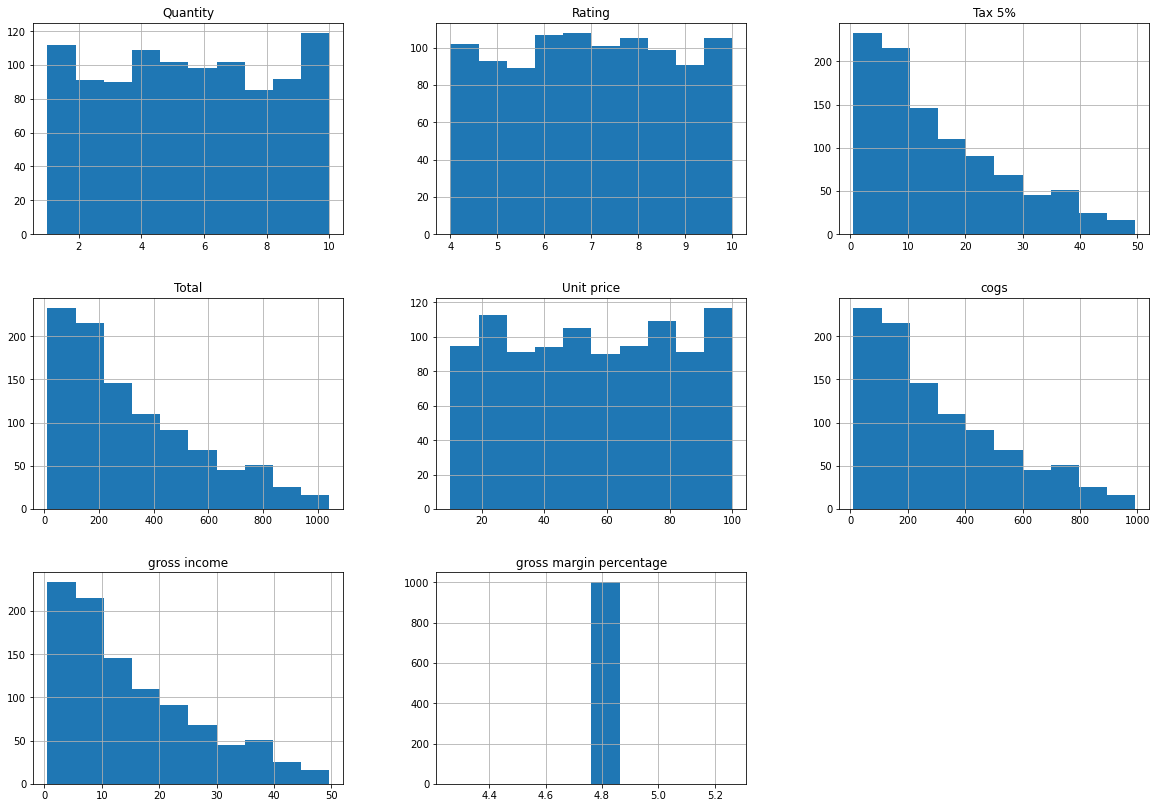

In [9]:
df.hist(figsize=(20,14))
plt.show()

In [10]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


## HEATMAP

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on templates.

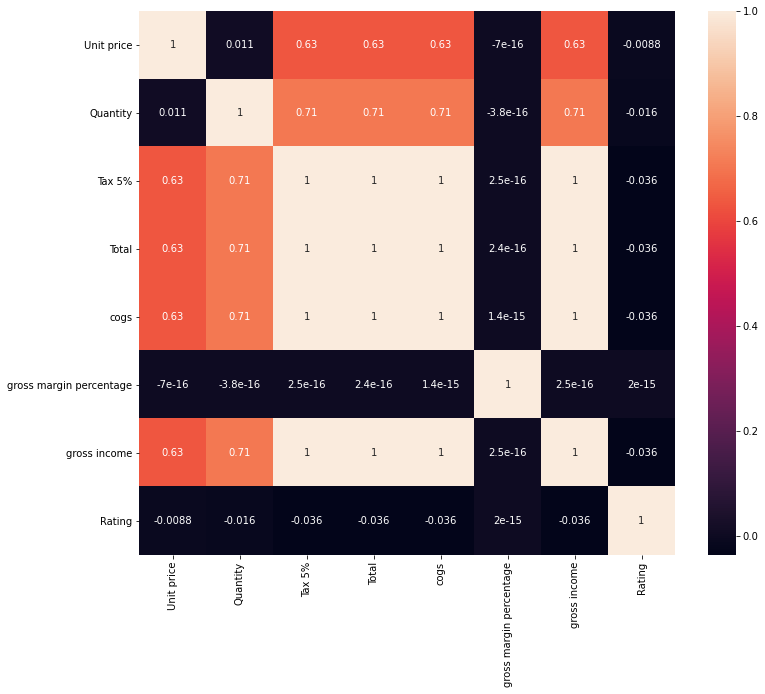

In [11]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

## BOXPLOT

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

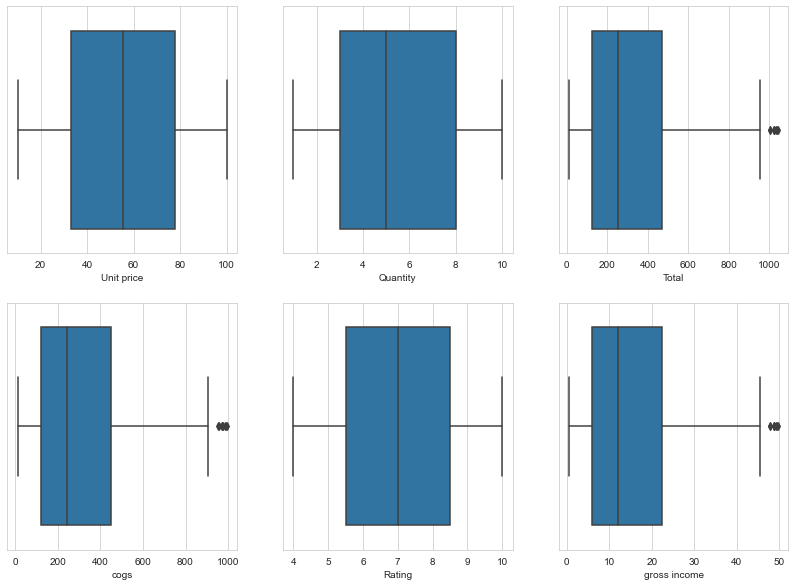

In [12]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')

plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

In [13]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Univariate 

In [14]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

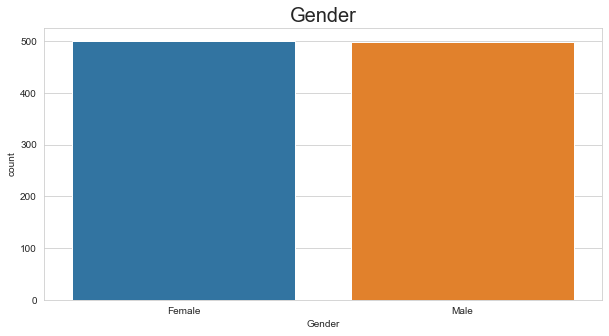

In [15]:
sns.countplot(x='Gender', data=df)
plt.title('Gender',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,5)

In [16]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

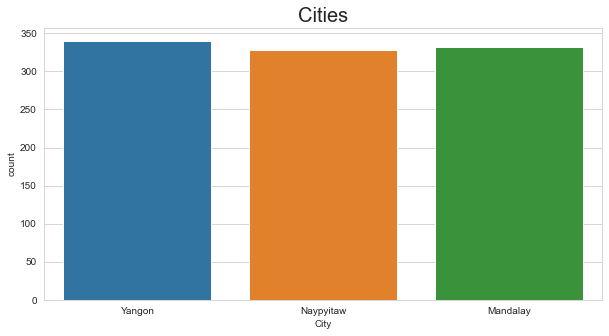

In [17]:
sns.countplot(x='City', data=df)
plt.title('Cities',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,5)

In [18]:
df['Quantity'].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

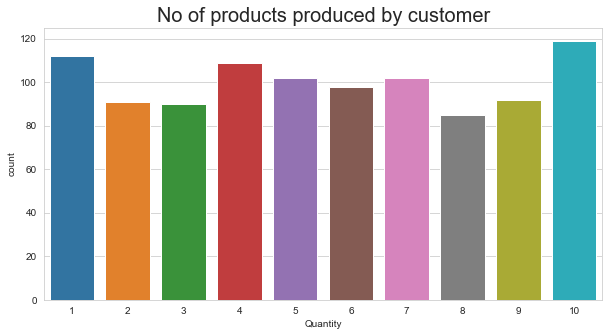

In [19]:
sns.countplot(x='Quantity', data=df)
plt.title('No of products produced by customer',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,5)

In [20]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'Customer type')

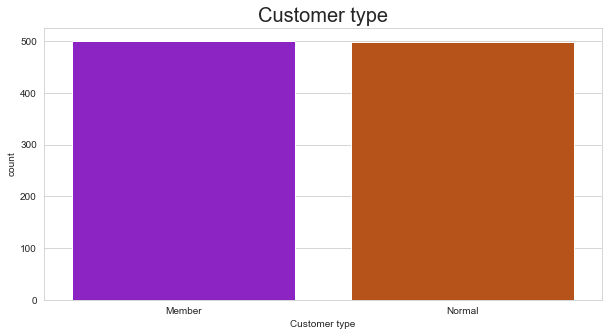

In [21]:
sns.countplot(x='Customer type', data=df, palette='gnuplot')
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Customer type',fontsize=20)

In [22]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Text(0.5, 1.0, 'Product line')

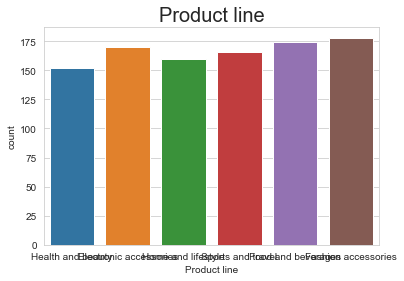

In [23]:
sns.countplot(x='Product line', data=df)
plt.title('Product line',fontsize=20)

In [24]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

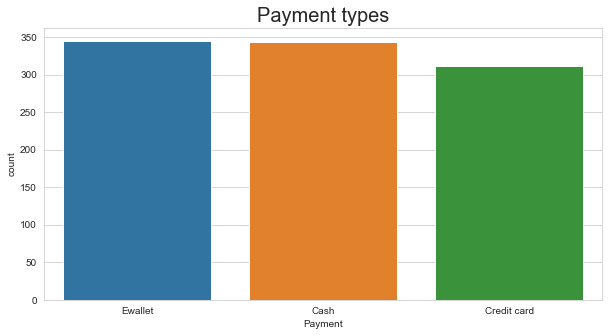

In [25]:
sns.countplot(x='Payment', data=df)
plt.title('Payment types',fontsize=20)
fig=plt.gcf()
fig.set_size_inches(10,5)

## Multivariate

In [26]:
Y1 = pd.crosstab(df['City'], df['Gender'])
Y1

Gender,Female,Male
City,,
Mandalay,162,170
Naypyitaw,178,150
Yangon,161,179


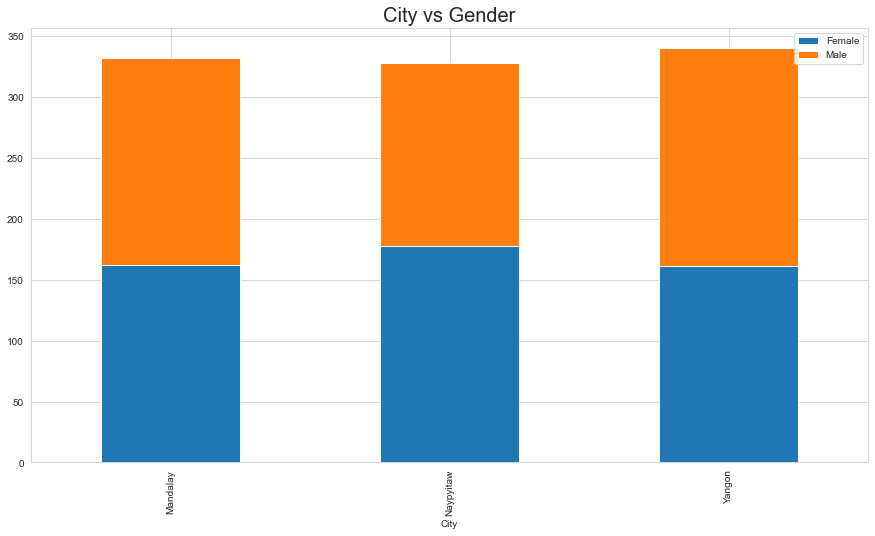

In [27]:
plt.rcParams['figure.figsize'] = (15, 8)
# Y1.div(Y1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
Y1.plot(kind = 'bar', stacked = True)
plt.title('City vs Gender', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

In [28]:
Y2 = pd.crosstab(df['City'], df['Customer type'])
Y2

Customer type,Member,Normal
City,,
Mandalay,165,167
Naypyitaw,169,159
Yangon,167,173


Text(0.5, 1.0, 'City vs Customer type')

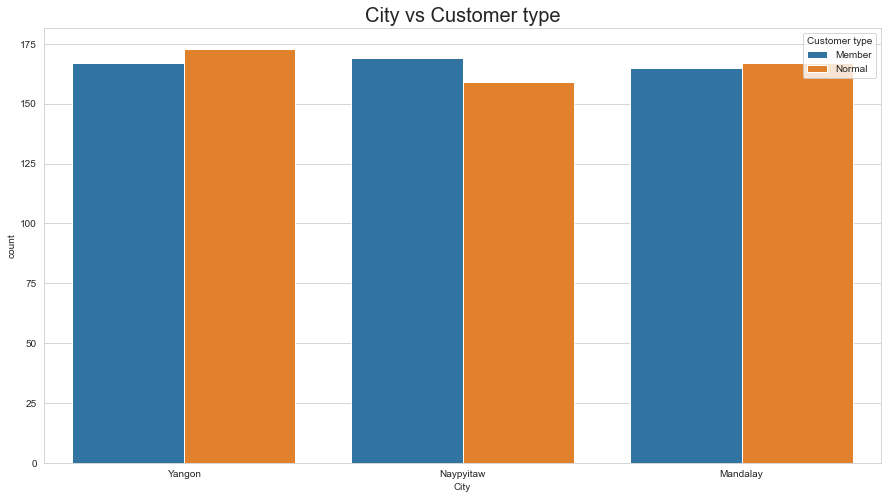

In [29]:
sns.countplot(x='City', hue='Customer type', data=df)
plt.title('City vs Customer type',fontsize=20)

Text(0.5, 1.0, 'Gender vs Customer')

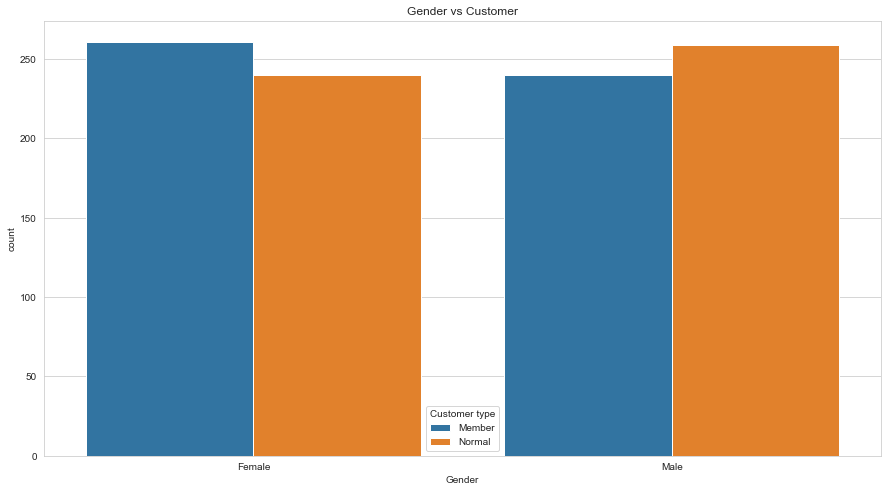

In [30]:
sns.countplot(x='Gender', hue='Customer type', data=df)
plt.title('Gender vs Customer')

Text(0.5, 1.0, 'Cities vs Customer type vs Male')

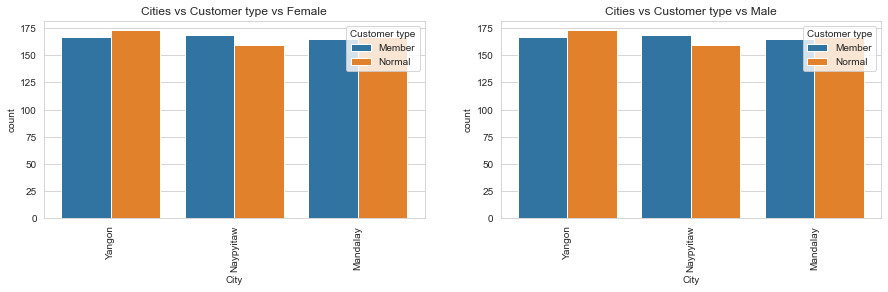

In [31]:

plt.subplot(2,2,1)
# plt.figure(figsize=(15,10))
dat = df[df['Gender']=='Female']
chart = sns.countplot(x = 'City', data=df, hue='Customer type')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
chart.plot()
plt.title('Cities vs Customer type vs Female')

plt.subplot(2,2,2)
# plt.figure(figsize=(15,10))
dat = df[df['Gender']=='Male']
chart = sns.countplot(x = 'City', data=df, hue='Customer type')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
chart.plot()
plt.title('Cities vs Customer type vs Male')

Text(0.5, 1.0, 'Product Popularity categorised by Gender')

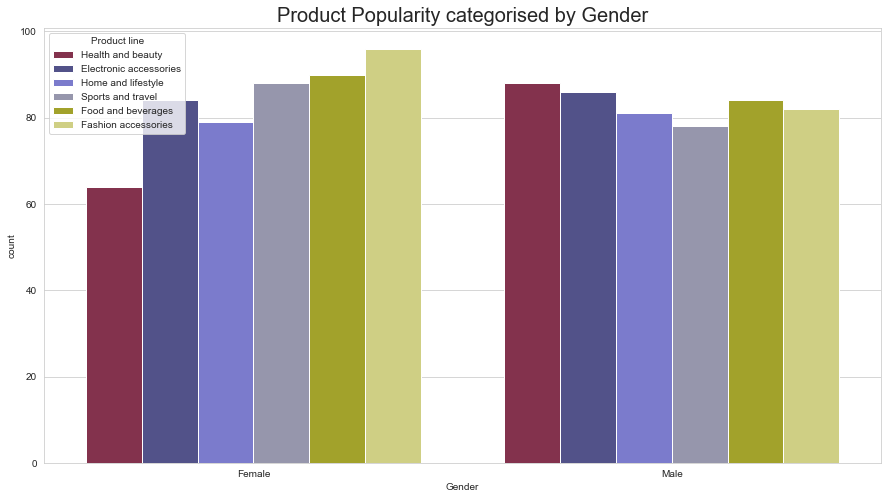

In [32]:
sns.countplot(x='Gender', data=df, hue='Product line', palette='gist_stern')
plt.title('Product Popularity categorised by Gender',fontsize=20)

Text(0.5, 1.0, 'Product Popularity categorised by City')

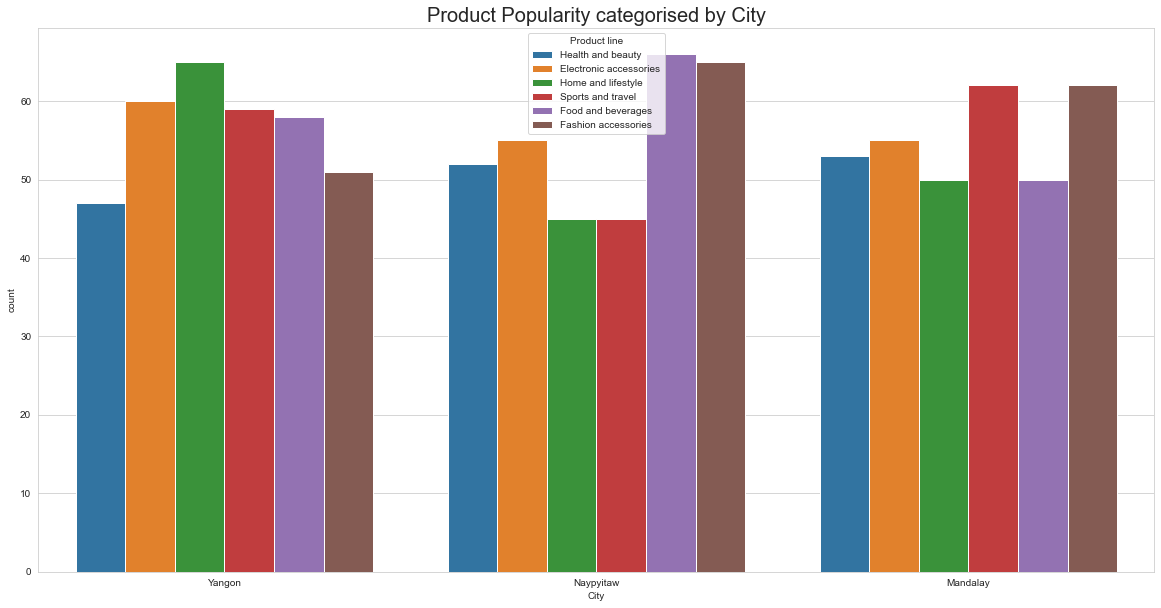

In [33]:
sns.countplot(x='City', data=df, hue='Product line')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Product Popularity categorised by City',fontsize=20)

Text(0.5, 1.0, 'Product Popularity categorised by City')

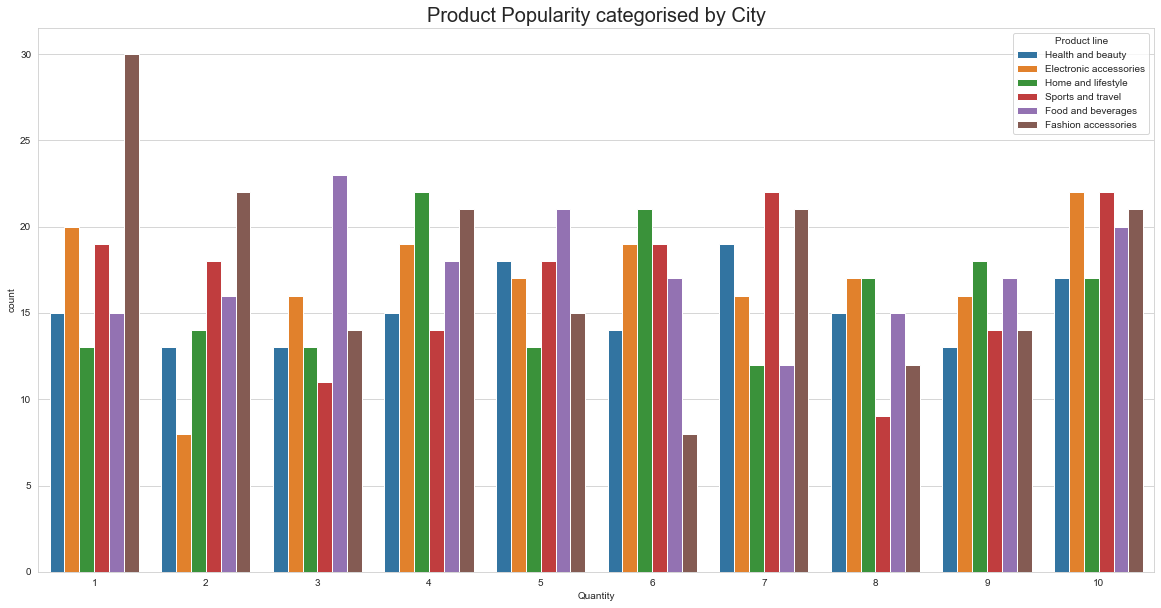

In [34]:
sns.countplot(x='Quantity', data=df, hue='Product line')
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.title('Product Popularity categorised by City',fontsize=20)

Text(0.5, 1.0, 'Payment vs Gender')

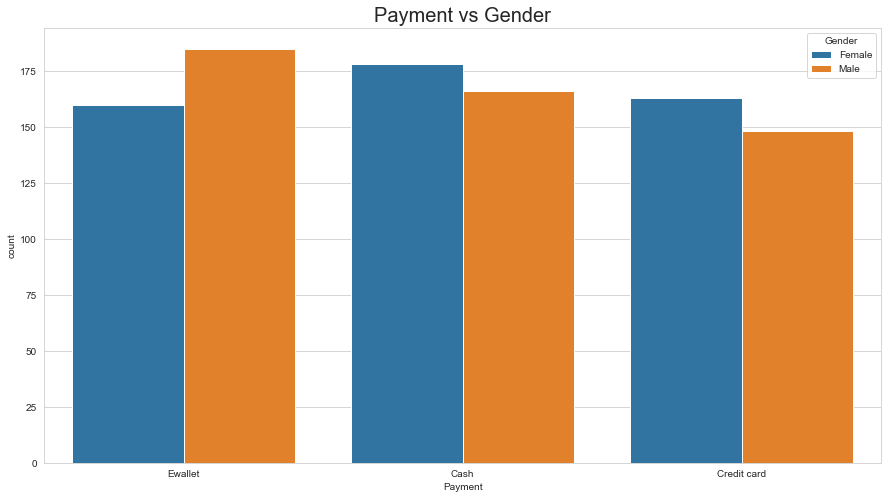

In [35]:
sns.countplot(x='Payment', data=df,hue='Gender')
plt.title('Payment vs Gender', fontsize=20)

Text(0.5, 1.0, 'Cities vs Payment')

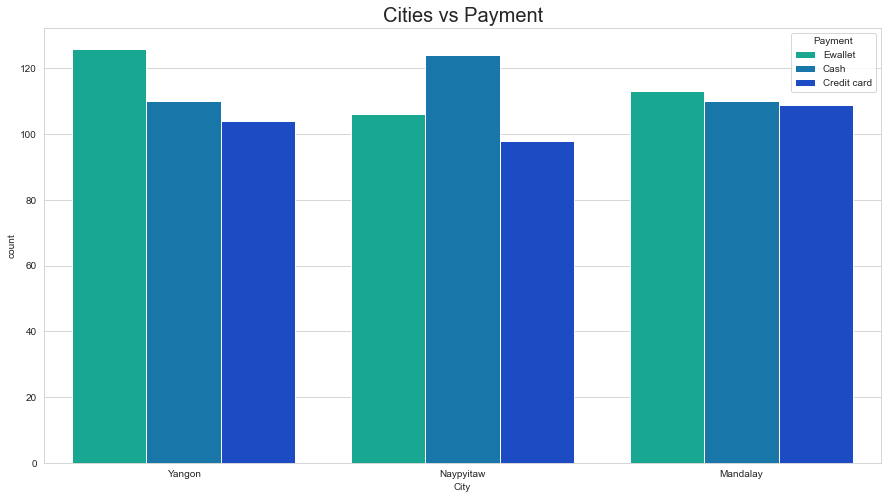

In [36]:
sns.countplot(x='City', data=df, hue='Payment', palette='winter_r')
plt.title('Cities vs Payment',fontsize=20)

Text(0.5, 1.0, 'Payment Channel by Branch')

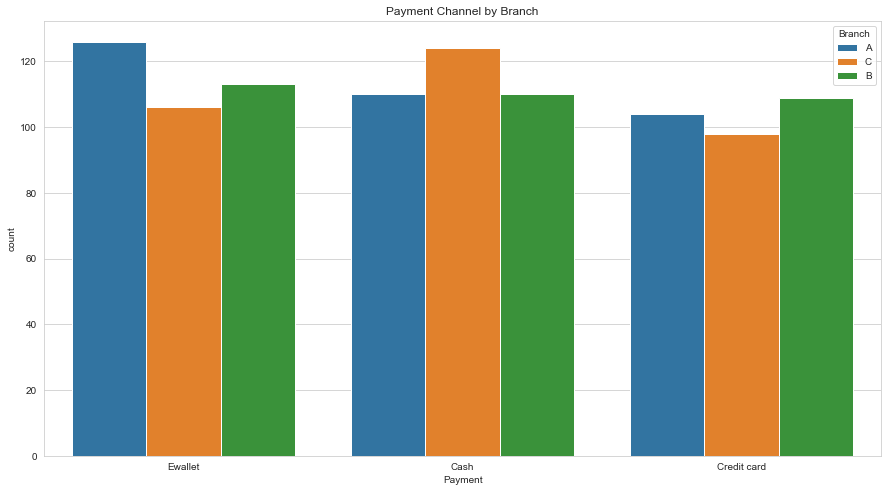

In [37]:
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch") 

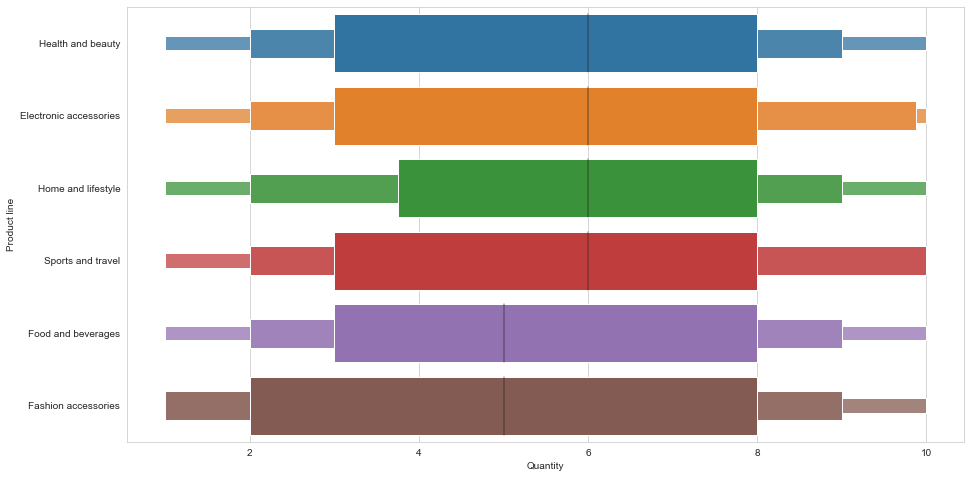

In [38]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )